In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot, skew, kurtosis
import numpy as np

In [4]:

# Load your dataset
df = pd.read_csv('/home/bhanu/Documents/DSP_proj/dataset/Housing.csv')

# 1. Statistical Summary
print("Statistical Summary:")
print(df.describe())




Statistical Summary:
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


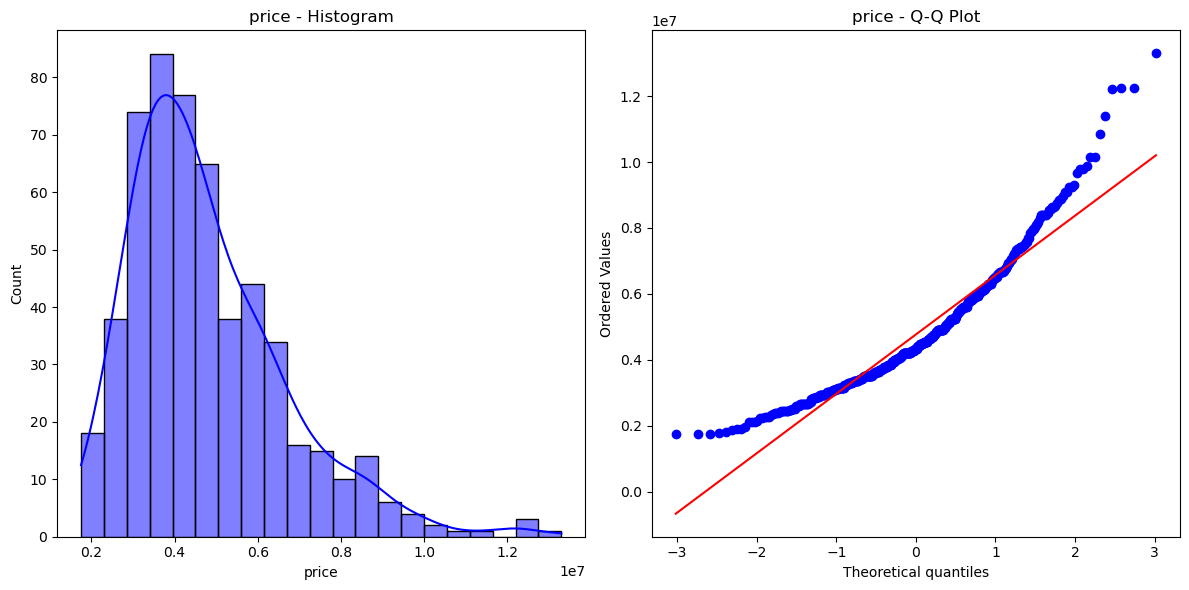

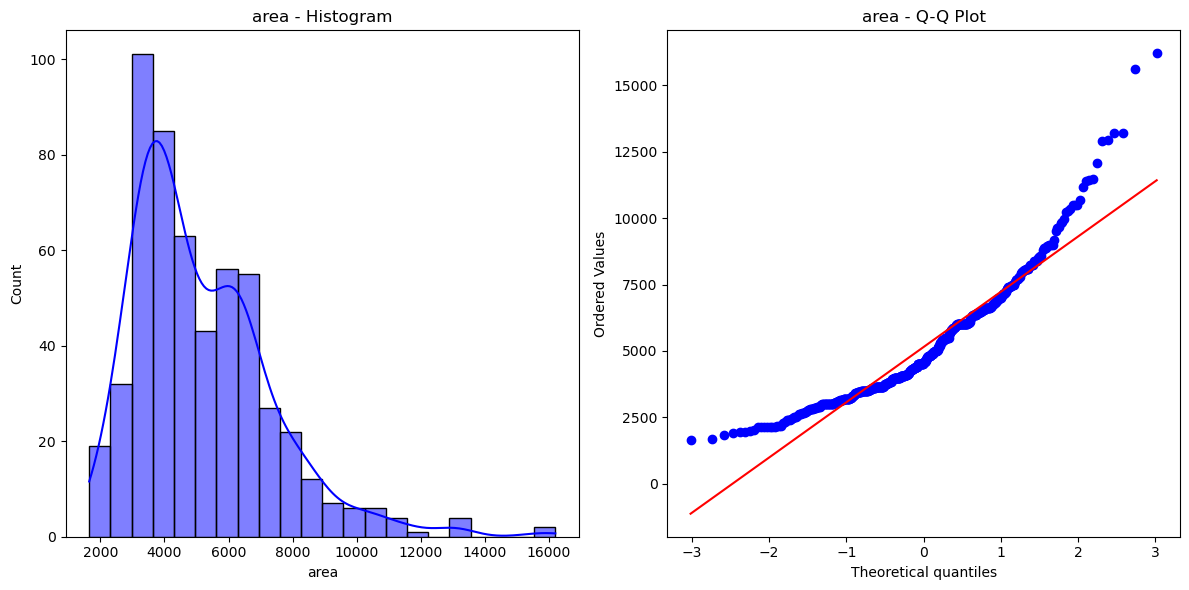

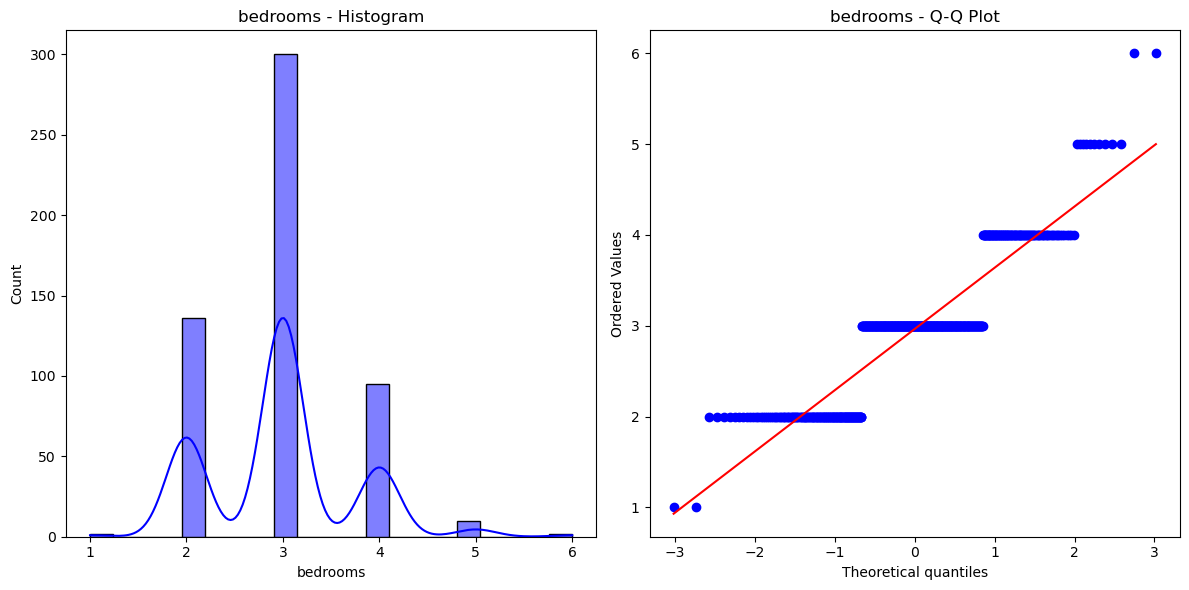

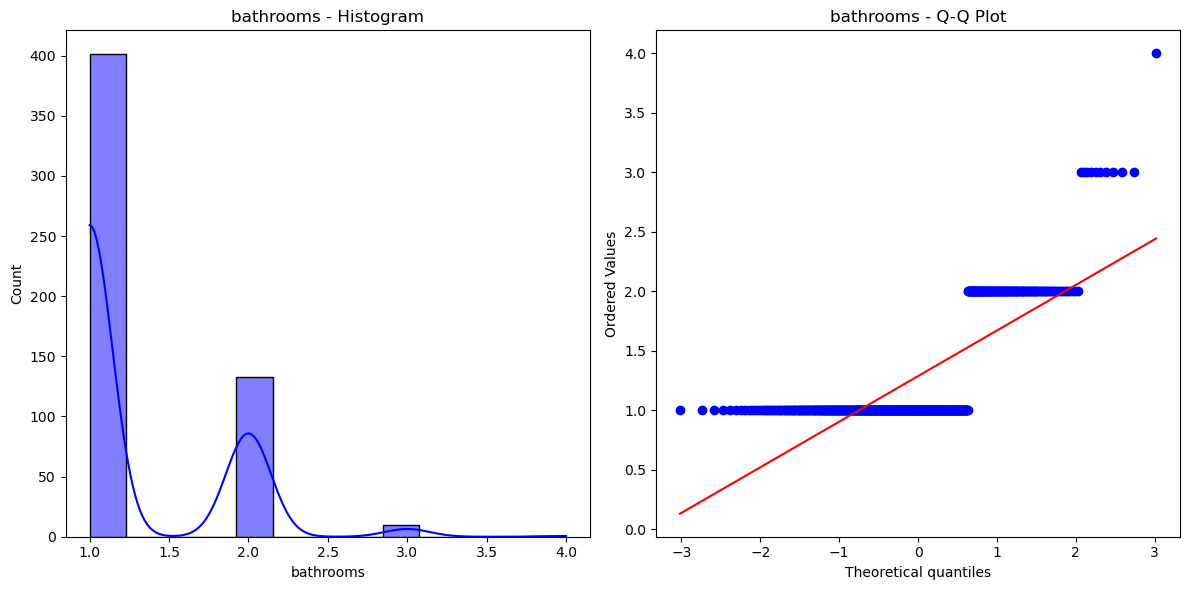

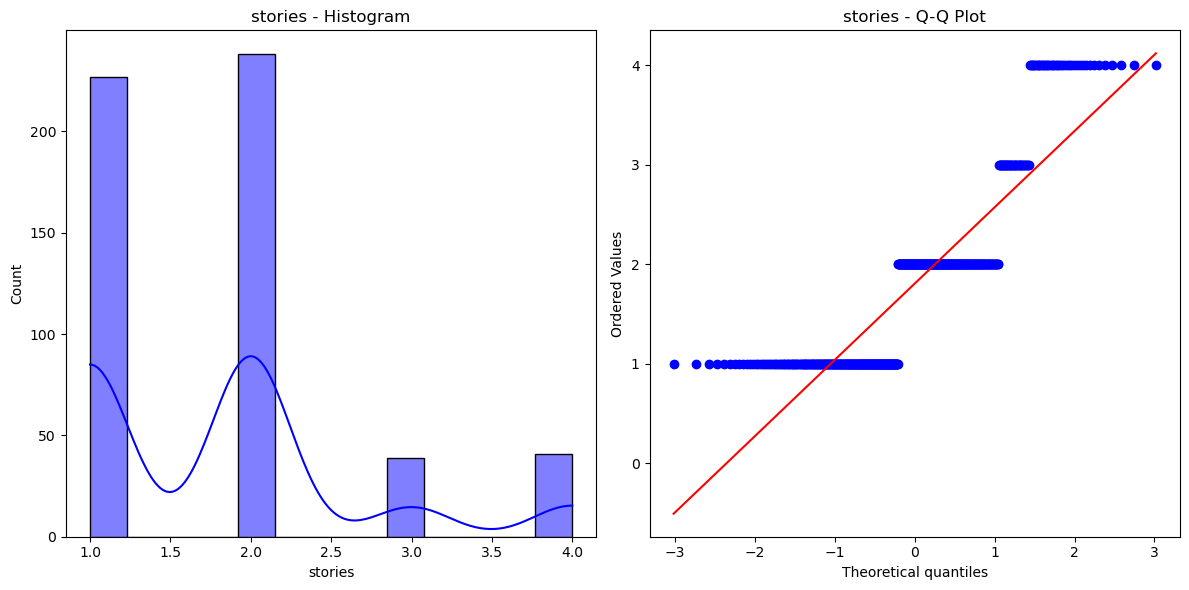

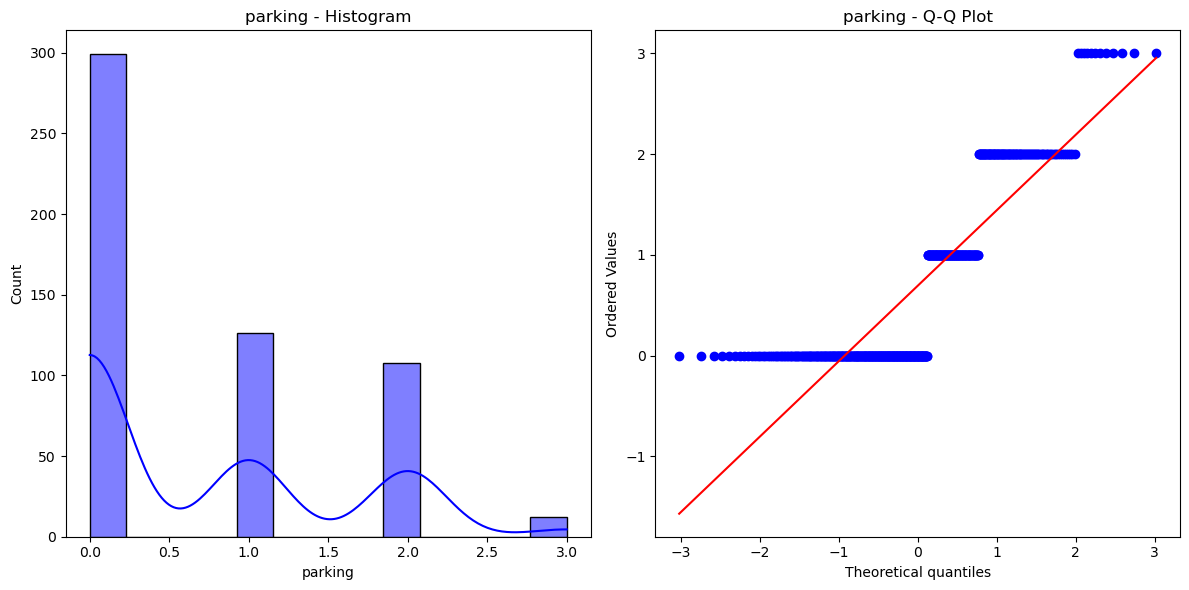

In [12]:
# 1. Distribution Analysis
def plot_distribution(df, column):
    plt.figure(figsize=(12, 6))

    # Plot Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], kde=True, color='blue')
    plt.title(f'{column} - Histogram')

    # Plot Q-Q Plot using scipy
    plt.subplot(1, 2, 2)
    probplot(df[column].dropna(), dist="norm", plot=plt)
    plt.title(f'{column} - Q-Q Plot')

    plt.tight_layout()
    plt.show()

# List of numeric columns to analyze
numeric_columns = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

for col in numeric_columns:
    plot_distribution(df, col)

In [13]:


# 2. Skewness and Kurtosis
def calculate_skewness_kurtosis(df, columns):
    for col in columns:
        col_skewness = skew(df[col].dropna())
        col_kurtosis = kurtosis(df[col].dropna())
        print(f'{col} - Skewness: {col_skewness:.2f}, Kurtosis: {col_kurtosis:.2f}')

calculate_skewness_kurtosis(df, numeric_columns)

price - Skewness: 1.21, Kurtosis: 1.93
area - Skewness: 1.32, Kurtosis: 2.72
bedrooms - Skewness: 0.49, Kurtosis: 0.71
bathrooms - Skewness: 1.58, Kurtosis: 2.13
stories - Skewness: 1.08, Kurtosis: 0.66
parking - Skewness: 0.84, Kurtosis: -0.58


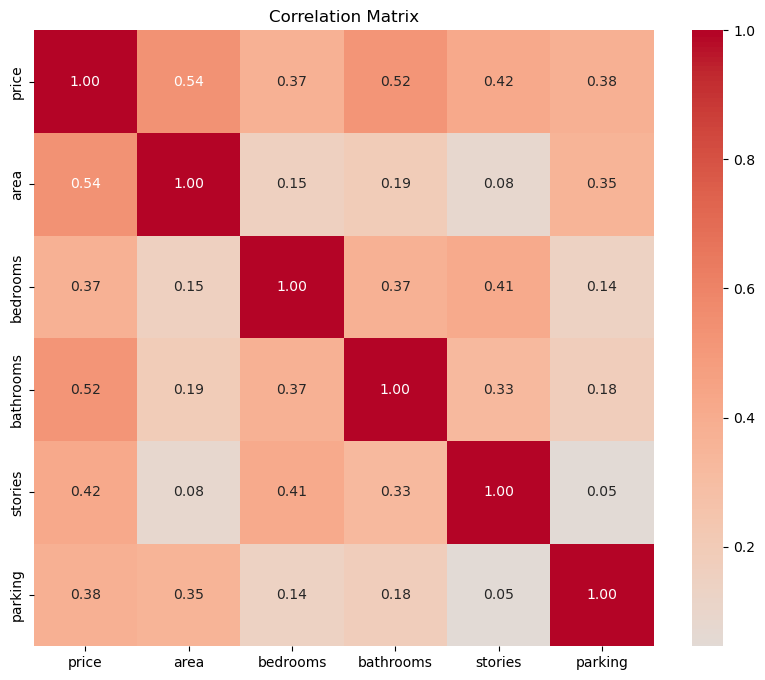

In [7]:
# 3. Correlation Matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', center=0)
plt.title('Correlation Matrix')
plt.show()

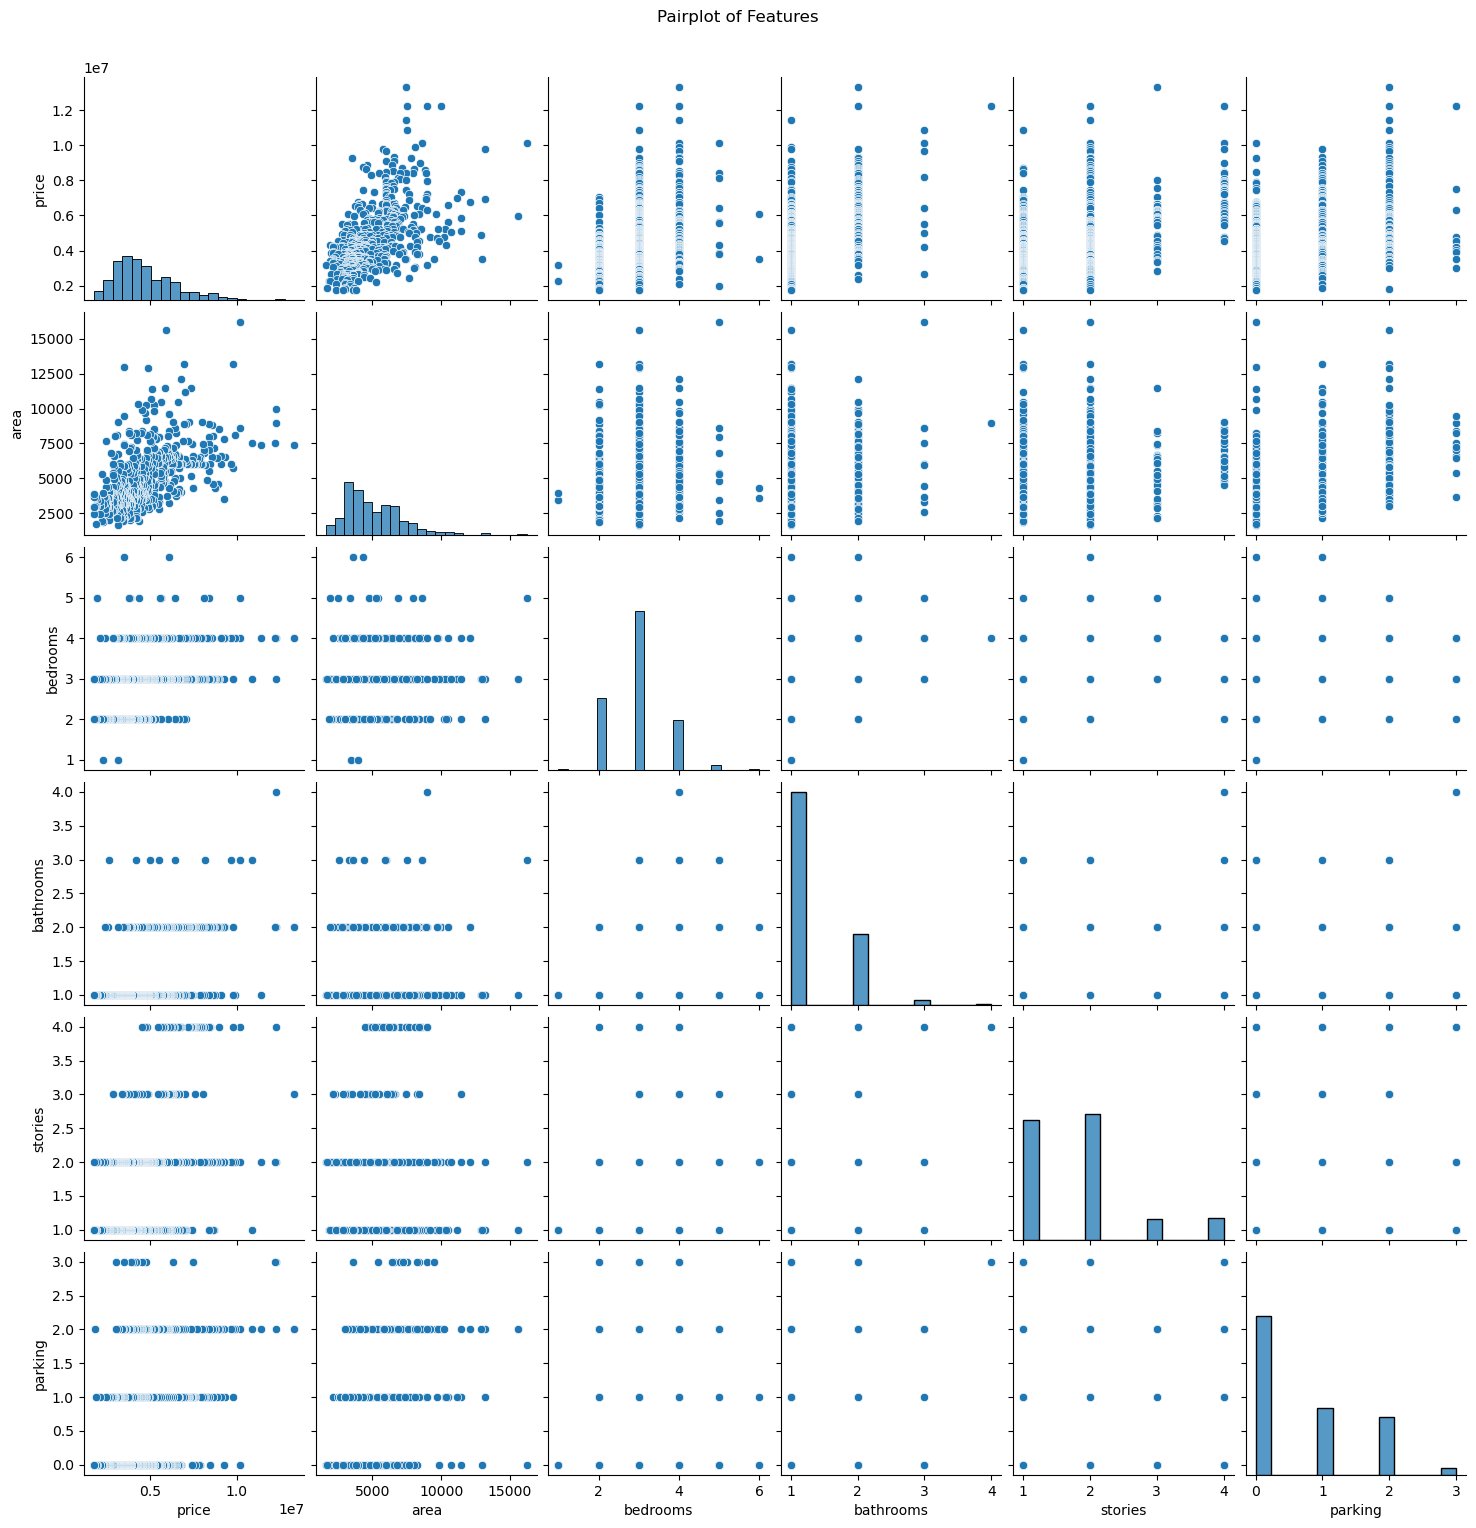

In [8]:
# 4. Pairplot for Feature Relationships
sns.pairplot(df[numeric_columns])
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()


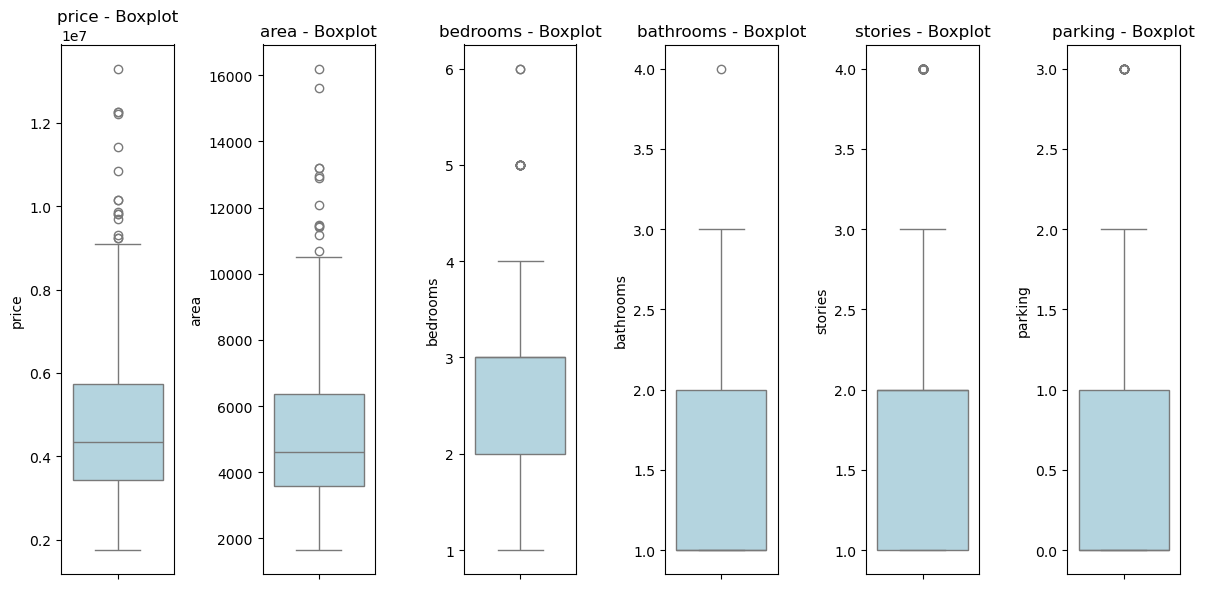

In [9]:
# 5. Boxplots to Visualize Outliers
plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_columns):
    plt.subplot(1, len(numeric_columns), i+1)
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(f'{col} - Boxplot')
plt.tight_layout()
plt.show()

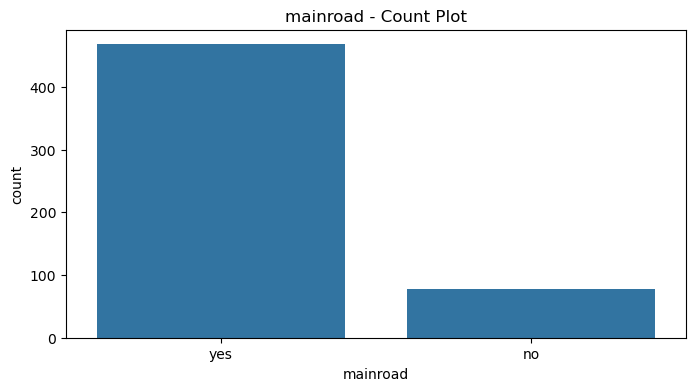

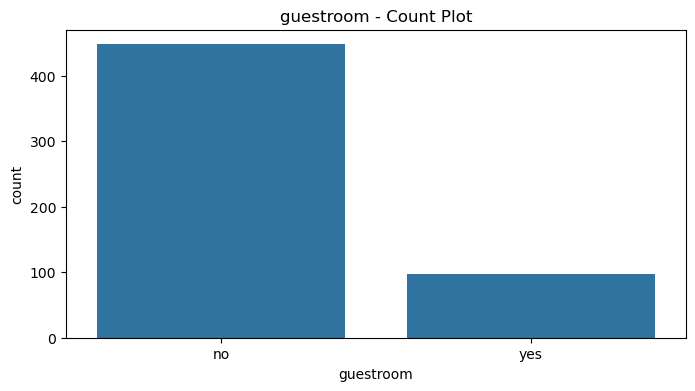

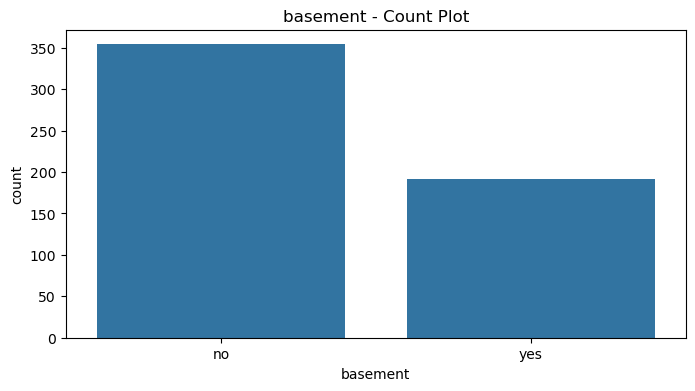

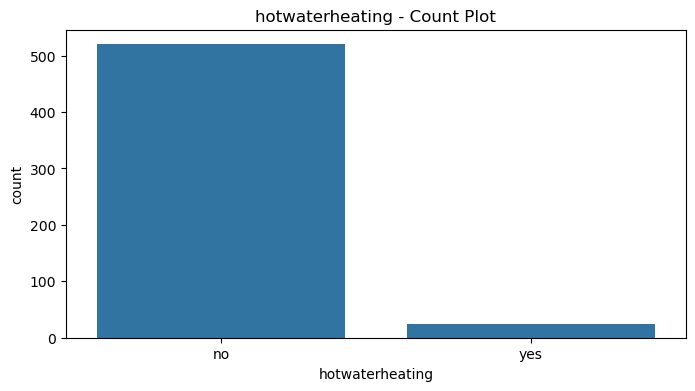

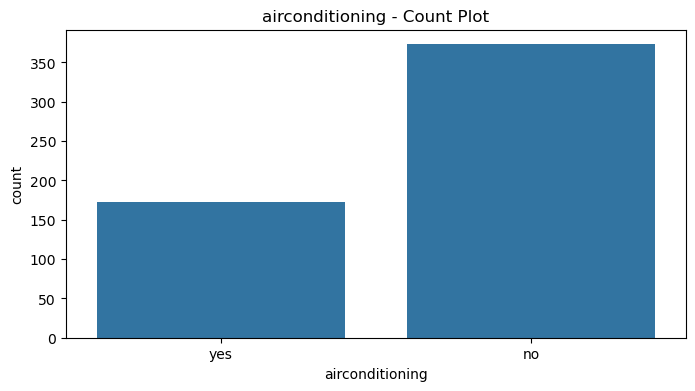

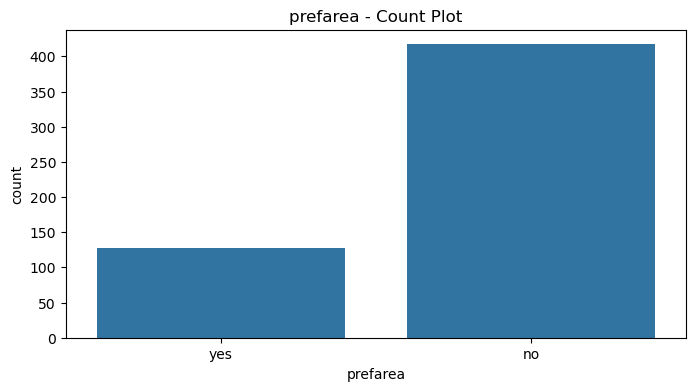

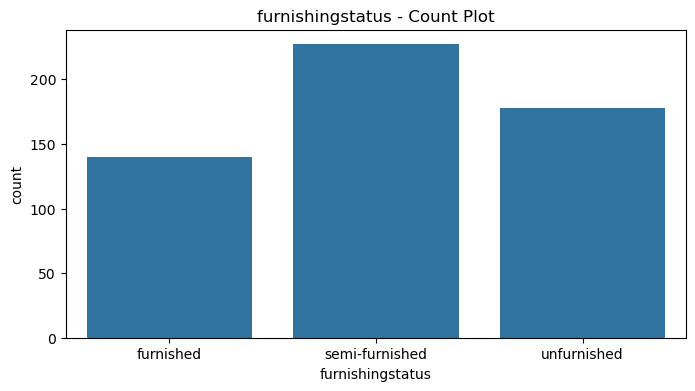

In [10]:
# 6. Categorical Feature Analysis
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col)
    plt.title(f'{col} - Count Plot')
    plt.show()

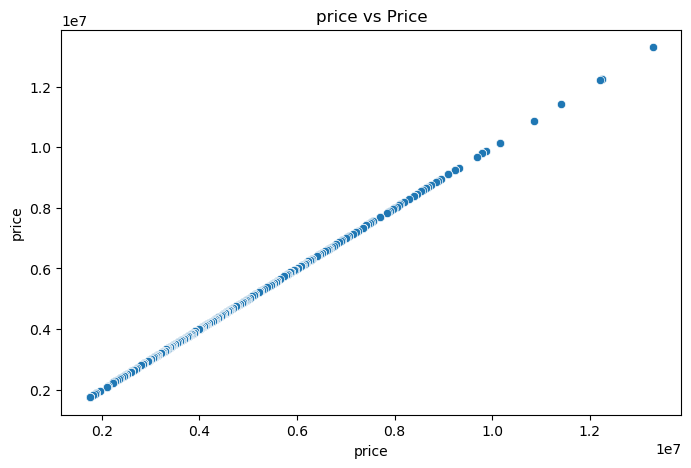

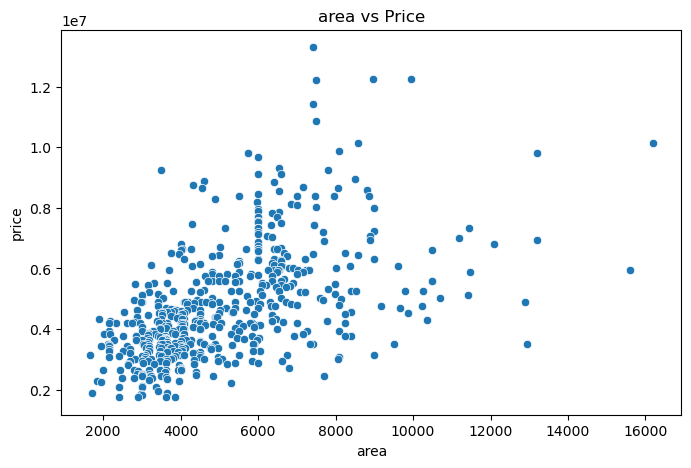

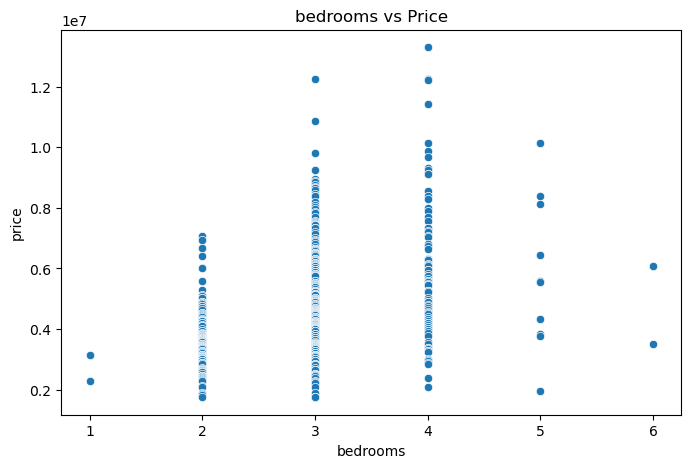

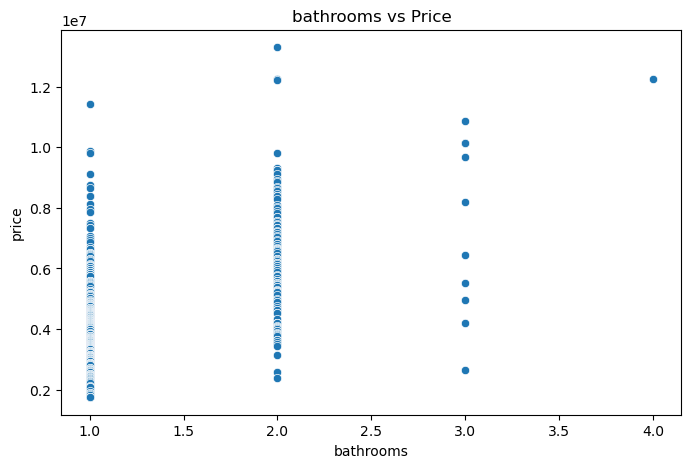

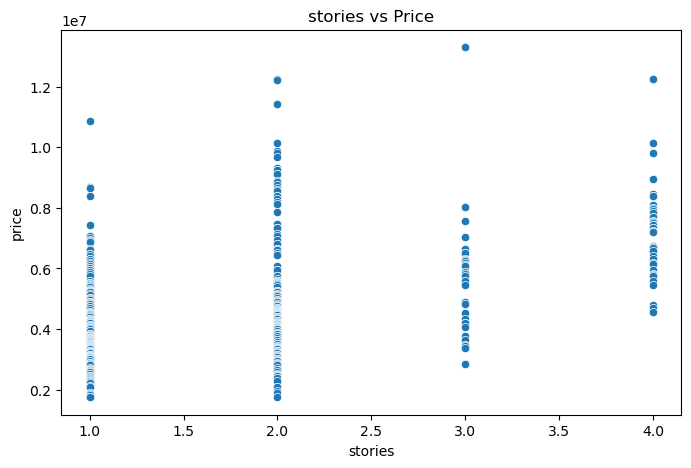

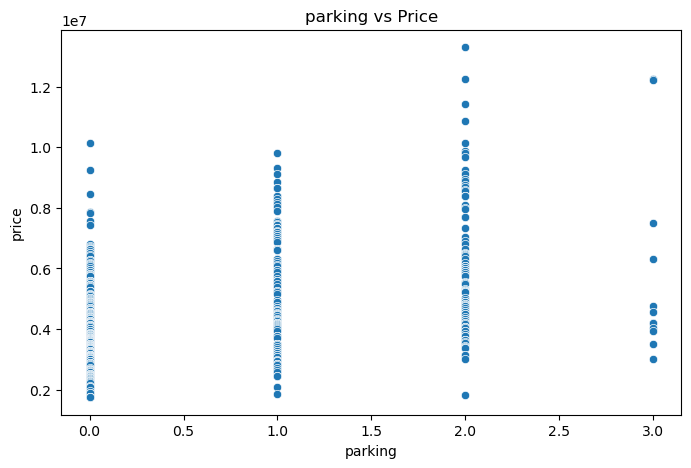

In [11]:
# 7. Feature Relationships with Target Variable
for col in numeric_columns:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df, x=col, y='price')
    plt.title(f'{col} vs Price')
    plt.show()